#  PDP - Payment Date Prediction

###  Import Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

###  Reading our dataset

In [2]:
data=pd.read_csv("H2HBABBA1190.CSV")
print(data.shape)

(50000, 19)


In [3]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200762301,C&S WH foundation,28/10/2019 00:00,2019,1929996904,11/10/2019,20191010,20191011,20191026,USD,RV,1,NaN,4236.42,20191011,NAC6,1.929997e+09,0
1,U001,200769623,WAL-MAR systems,NaN,2020,1930859997,05/05/2020,20200505,20200505,20200520,USD,RV,1,NaN,36603.87,20200505,NAH4,1.930860e+09,1
2,CA02,140104409,LOB in,03/09/2019 00:00,2019,2960573817,18/08/2019,20190818,20190818,20190901,CAD,RV,1,NaN,112092.52,20190822,CA10,2.960574e+09,0
3,CA02,140104277,WALLA foundation,NaN,2020,2960630005,19/04/2020,20200420,20200419,20200508,CAD,RV,1,NaN,46291.48,20200428,CA10,2.960630e+09,1
4,U001,200769623,WAL-MAR trust,11/02/2019 00:00,2019,1928722115,31/01/2019,20190201,20190131,20190215,USD,RV,1,NaN,3151.44,20190131,NAH4,1.928722e+09,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### We Slice out the records with Clearing date Null into a separate DataFrame for test set name as main_test

In [5]:
##we Slice out the records with Clearing date Null into a separate DataFrame for test set nameas main_test
main_train=data[data.clear_date.isnull()==False]
main_test=data[data.clear_date.isnull()==True]

In [6]:
main_train.shape,main_test.shape

((40000, 19), (10000, 19))

In [7]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200762301,C&S WH foundation,28/10/2019 00:00,2019,1929996904,11/10/2019,20191010,20191011,20191026,USD,RV,1,NaN,4236.42,20191011,NAC6,1.929997e+09,0
2,CA02,140104409,LOB in,03/09/2019 00:00,2019,2960573817,18/08/2019,20190818,20190818,20190901,CAD,RV,1,NaN,112092.52,20190822,CA10,2.960574e+09,0
4,U001,200769623,WAL-MAR trust,11/02/2019 00:00,2019,1928722115,31/01/2019,20190201,20190131,20190215,USD,RV,1,NaN,3151.44,20190131,NAH4,1.928722e+09,0
5,CA02,140104229,A & W F corporation,26/04/2019 00:00,2019,2960541199,12/04/2019,20190412,20190412,20190422,CAD,RV,1,NaN,1537.65,20190412,CA10,2.960541e+09,0
7,U001,200769623,WAL-MAR corporation,26/02/2019 00:00,2019,1928810201,16/02/2019,20190216,20190216,20190303,USD,RV,1,NaN,26130.42,20190216,NAH4,1.928810e+09,0


In [8]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200769623,WAL-MAR systems,NaN,2020,1930859997,05/05/2020,20200505,20200505,20200520,USD,RV,1,NaN,36603.87,20200505,NAH4,1.930860e+09,1
3,CA02,140104277,WALLA foundation,NaN,2020,2960630005,19/04/2020,20200420,20200419,20200508,CAD,RV,1,NaN,46291.48,20200428,CA10,2.960630e+09,1
6,U001,200743996,STATER associates,NaN,2020,1930720295,01/04/2020,20200330,20200401,20200416,USD,RV,1,NaN,37465.05,20200401,NAA8,1.930720e+09,1
9,U001,100024776,PEA corp,NaN,2020,1930575519,28/02/2020,20200226,20200228,20200403,USD,RV,1,NaN,7832.30,20200228,NAG2,1.930576e+09,1
14,U001,200769623,WAL-MAR us,NaN,2020,1930724160,31/03/2020,20200331,20200331,20200415,USD,RV,1,NaN,1898.20,20200331,NAH4,1.930724e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49959,U001,200712105,WALG llc,NaN,2020,1930594858,03/03/2020,20200303,20200303,20200318,USD,RV,1,NaN,645.09,20200303,NAA8,1.930595e+09,1
49975,U001,200704858,WAKE trust,NaN,2020,1930857034,05/05/2020,20200504,20200505,20200520,USD,RV,1,NaN,44930.59,20200505,NAA8,1.930857e+09,1
49981,U001,200769623,WAL-MAR in,NaN,2020,1930583601,01/03/2020,20200229,20200301,20200316,USD,RV,1,NaN,1626.33,20200301,NAH4,1.930584e+09,1
49994,U001,200806580,BE trust,NaN,2020,1930675914,25/03/2020,20200320,20200325,20200409,USD,RV,1,NaN,5434.02,20200325,NAA8,1.930676e+09,1


# Data Preprocessing

## Date Time Conversion

### Convert clear_date(object) into datetime 

In [9]:
main_train['clear_date']=pd.to_datetime(main_train['clear_date'])##convert cleardate(object) into datetime

In [10]:
##so due_date is in right now in "int" format which is not in proper structure so
##,to converting due_date into datetime format first we use strtime to set structure and 
##then use simple datetime to change it into date format
main_train['due_in_date'] = pd.to_datetime(main_train['due_in_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
main_train['due_in_date']=pd.to_datetime(main_train['due_in_date'])
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
main_test['due_in_date']=pd.to_datetime(main_test['due_in_date'])


In [11]:
##same process will apply for
##'document_create_date','document_create_date.1','baseline_create_date' because they re also in int format
main_train['document_create_date'] = pd.to_datetime(main_train['document_create_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
main_train['document_create_date']=pd.to_datetime(main_train['document_create_date'])

main_train['document_create_date.1'] = pd.to_datetime(main_train['document_create_date.1'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
main_train['document_create_date.1']=pd.to_datetime(main_train['document_create_date.1']) 

main_train['baseline_create_date'] = pd.to_datetime(main_train['baseline_create_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
main_train['baseline_create_date']=pd.to_datetime(main_train['baseline_create_date'])


In [12]:
main_train['posting_date'] = pd.to_datetime(main_train['posting_date'], format = "%d/%m/%Y").dt.strftime('%Y-%m-%d')
main_train['posting_date']=pd.to_datetime(main_train['posting_date']) 
main_test['posting_date'] = pd.to_datetime(main_test['posting_date'], format = "%d/%m/%Y").dt.strftime('%Y-%m-%d')
main_test['posting_date']=pd.to_datetime(main_test['posting_date']) 


In [13]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200769623,WAL-MAR systems,NaN,2020,1930859997,2020-05-05,20200505,20200505,2020-05-20,USD,RV,1,NaN,36603.87,20200505,NAH4,1.930860e+09,1
3,CA02,140104277,WALLA foundation,NaN,2020,2960630005,2020-04-19,20200420,20200419,2020-05-08,CAD,RV,1,NaN,46291.48,20200428,CA10,2.960630e+09,1
6,U001,200743996,STATER associates,NaN,2020,1930720295,2020-04-01,20200330,20200401,2020-04-16,USD,RV,1,NaN,37465.05,20200401,NAA8,1.930720e+09,1
9,U001,100024776,PEA corp,NaN,2020,1930575519,2020-02-28,20200226,20200228,2020-04-03,USD,RV,1,NaN,7832.30,20200228,NAG2,1.930576e+09,1
14,U001,200769623,WAL-MAR us,NaN,2020,1930724160,2020-03-31,20200331,20200331,2020-04-15,USD,RV,1,NaN,1898.20,20200331,NAH4,1.930724e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49959,U001,200712105,WALG llc,NaN,2020,1930594858,2020-03-03,20200303,20200303,2020-03-18,USD,RV,1,NaN,645.09,20200303,NAA8,1.930595e+09,1
49975,U001,200704858,WAKE trust,NaN,2020,1930857034,2020-05-05,20200504,20200505,2020-05-20,USD,RV,1,NaN,44930.59,20200505,NAA8,1.930857e+09,1
49981,U001,200769623,WAL-MAR in,NaN,2020,1930583601,2020-03-01,20200229,20200301,2020-03-16,USD,RV,1,NaN,1626.33,20200301,NAH4,1.930584e+09,1
49994,U001,200806580,BE trust,NaN,2020,1930675914,2020-03-25,20200320,20200325,2020-04-09,USD,RV,1,NaN,5434.02,20200325,NAA8,1.930676e+09,1


In [14]:
 main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  int64         
 5   doc_id                  40000 non-null  int64         
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  datetime64[ns]
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  document type           40000 non-null  object        
 12  posting_id              40000 non-null  int64 

# Prepare our Target column

In [15]:
##to create a target we findout NoOfDelay from clear_date-due_in_date and store it on main_train
main_train['Delay']=(main_train['clear_date']- main_train['due_in_date']).dt.days
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U001,200762301,C&S WH foundation,2019-10-28,2019,1929996904,2019-10-11,2019-10-10,2019-10-11,2019-10-26,USD,RV,1,NaN,4236.42,2019-10-11,NAC6,1.929997e+09,0,2
2,CA02,140104409,LOB in,2019-03-09,2019,2960573817,2019-08-18,2019-08-18,2019-08-18,2019-09-01,CAD,RV,1,NaN,112092.52,2019-08-22,CA10,2.960574e+09,0,-176
4,U001,200769623,WAL-MAR trust,2019-11-02,2019,1928722115,2019-01-31,2019-02-01,2019-01-31,2019-02-15,USD,RV,1,NaN,3151.44,2019-01-31,NAH4,1.928722e+09,0,260
5,CA02,140104229,A & W F corporation,2019-04-26,2019,2960541199,2019-04-12,2019-04-12,2019-04-12,2019-04-22,CAD,RV,1,NaN,1537.65,2019-04-12,CA10,2.960541e+09,0,4
7,U001,200769623,WAL-MAR corporation,2019-02-26,2019,1928810201,2019-02-16,2019-02-16,2019-02-16,2019-03-03,USD,RV,1,NaN,26130.42,2019-02-16,NAH4,1.928810e+09,0,-5


### Null impution

In [16]:
main_train.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
Delay                         0
dtype: int64

In [17]:
main_train.isnull().mean()

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.00000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
document type             0.00000
posting_id                0.00000
area_business             1.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00005
isOpen                    0.00000
Delay                     0.00000
dtype: float64

##### As i can see that the area business column is MCAR means all the observations having prob.of 1 that means there is no data for this coulmn at all so we simply drop it from our traing dataset.


In [18]:
main_train.drop('area_business', axis=1, inplace=True)
main_train.shape

(40000, 19)

In [19]:
##we re also having 2null values in invoice id let's see them
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
25058,CA02,140104225,SAVE-ON- us,2019-08-05,2019,9500000095,2019-03-29,2019-03-29,2019-03-12,2019-03-22,CAD,X2,1,4223.52,2019-03-12,CA10,NaN,0,136
41108,CA02,140104409,LOB associates,2019-04-17,2019,9500000077,2019-03-29,2019-03-29,2019-03-14,2019-03-24,CAD,X2,1,698.60,2019-03-14,CA10,NaN,0,24


In [20]:
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                2
isOpen                    0
Delay                     0
dtype: int64

In [21]:
#Dropping the record contating null value as the invoice id is MCAR and 
## so 2-3 rows doesnot matter much just remove them also
main_train = main_train[main_train.invoice_id.isnull()==False]

In [22]:
main_train.isna().sum()  ##so we re now done with null impution

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
Delay                     0
dtype: int64

In [23]:
main_train.shape

(39998, 19)

## Constant/Duplicate Removal 

In [24]:
main_train.nunique()

business_code                 6
cust_number                1020
name_customer              3932
clear_date                  396
buisness_year                 2
doc_id                    39093
posting_date                422
document_create_date        426
document_create_date.1      422
due_in_date                 486
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35594
baseline_create_date        427
cust_payment_terms           70
invoice_id                39093
isOpen                        1
Delay                       589
dtype: int64

##### Observations:-1.As I can see from PRS that  the posting_date,document_create_date,docoment_create_date.1 and baseline_create_date are the same which is the date on which the invoice is created so we  keep one 'posting_date' and drop rest three coulmn to avoid duplipication. 
##### 2. As i can see that our model is the timebased splitting model that means there is no need of constant or quasi-constant coulmn which is not changing in time like columns like  'cust_number','name_customer','invoice_id','doc_id'. so these coulmns our not that much useful so i decided to drop them

In [25]:
main_train.drop(['cust_number','name_customer','buisness_year','doc_id','document_create_date','document_create_date.1','invoice_id','baseline_create_date'],axis=1,inplace=True)

In [26]:

main_test=main_test.drop(['cust_number','name_customer','buisness_year','doc_id','document_create_date','document_create_date.1','invoice_id','baseline_create_date'],axis=1)

In [27]:
main_train['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

## Sorted the data in ascending order so we have a better timebased splitting model

In [28]:
main_train=main_train.sort_values(by=['clear_date'])
main_test=main_test.sort_values(by=['clear_date'])

In [29]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 29464 to 13582
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       39998 non-null  object        
 1   clear_date          39998 non-null  datetime64[ns]
 2   posting_date        39998 non-null  datetime64[ns]
 3   due_in_date         39998 non-null  datetime64[ns]
 4   invoice_currency    39998 non-null  object        
 5   document type       39998 non-null  object        
 6   posting_id          39998 non-null  int64         
 7   total_open_amount   39998 non-null  float64       
 8   cust_payment_terms  39998 non-null  object        
 9   isOpen              39998 non-null  int64         
 10  Delay               39998 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 3.7+ MB


In [30]:
main_train.head()

,business_code,clear_date,posting_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,cust_payment_terms,isOpen,Delay
29464,CA02,2019-01-02,2019-01-15,2019-01-26,CAD,RV,1,97012.80,CA10,0,-24
17978,U001,2019-01-02,2019-01-28,2019-02-08,USD,RV,1,8234.58,NAM4,0,-37
45903,U001,2019-01-02,2019-01-15,2019-01-30,USD,RV,1,53160.36,NAH4,0,-28
41745,U001,2019-01-02,2019-01-22,2019-02-06,USD,RV,1,18.02,NAH4,0,-35
47197,U001,2019-01-02,2019-01-16,2019-01-31,USD,RV,1,352.19,NAA8,0,-29


# EDA

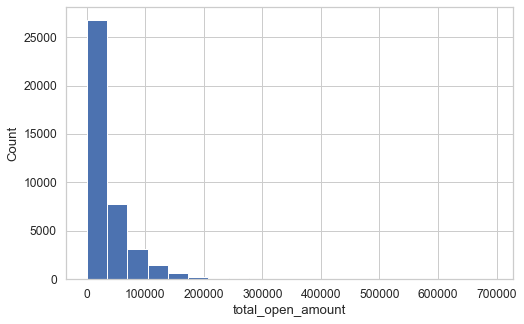

In [31]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    main_train['total_open_amount'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='total_open_amount', ylabel='Count');

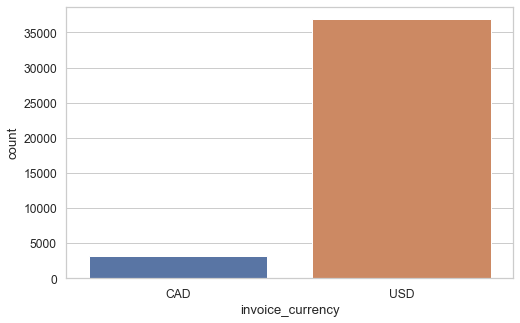

In [32]:
sns.countplot(main_train['invoice_currency']);##max category of USD currency

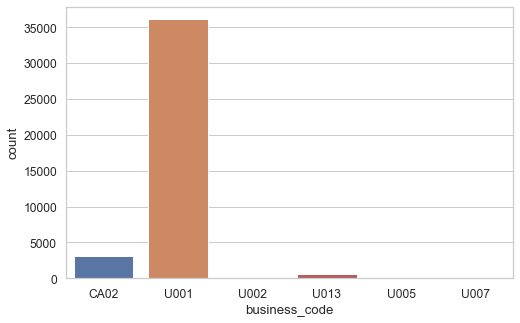

In [33]:
sns.countplot(main_train['business_code']); ##max category of 'U001'

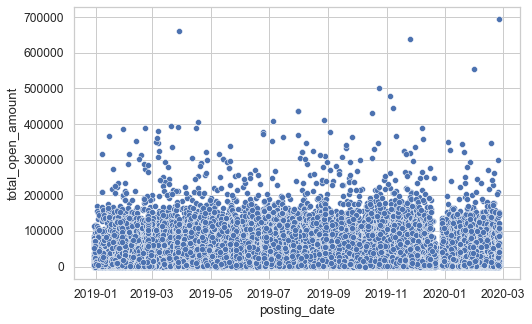

In [34]:
sns.scatterplot(x=main_train['posting_date'], y=main_train['total_open_amount']);

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

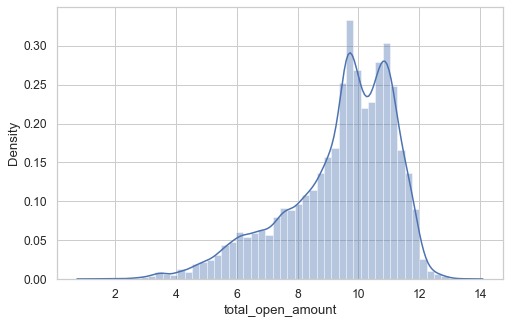

In [35]:
sns.distplot(np.log(main_train['total_open_amount']))

# Feature Engineering

#### In this section first using scikit learn's preprocessing LabelEncoder  we will convert the string object into a encoded format like right now 'business_code','invoice_currency','document type','cust_payment_terms','posting_id' are in string format so using LabelEncoder we convert them into oridinal integer.

In [36]:
from sklearn.preprocessing import LabelEncoder
Business_encoder = LabelEncoder()
Business_encoder.fit(main_train['business_code'])
main_train['business_code_enc'] = Business_encoder.transform(main_train['business_code'])

In [37]:
from sklearn.preprocessing import LabelEncoder
Business_encoder = LabelEncoder()
Business_encoder.fit(main_test['business_code'])
main_test['business_code_enc'] = Business_encoder.transform(main_test['business_code'])

In [38]:
Invoice_currency_enc = LabelEncoder()
Invoice_currency_enc.fit(main_train['invoice_currency'])
main_train['invoice_currency'] = Invoice_currency_enc.transform(main_train['invoice_currency'])

In [39]:
Invoice_currency_enc = LabelEncoder()
Invoice_currency_enc.fit(main_test['invoice_currency'])
main_test['invoice_currency'] = Invoice_currency_enc.transform(main_test['invoice_currency'])

In [40]:
Cust_payment_terms_enc = LabelEncoder()
Cust_payment_terms_enc.fit(main_train['cust_payment_terms'])
main_train['cust_payment_terms'] = Cust_payment_terms_enc.transform(main_train['cust_payment_terms'])

In [41]:
Cust_payment_terms_enc = LabelEncoder()
Cust_payment_terms_enc.fit(main_test['cust_payment_terms'])
main_test['cust_payment_terms'] = Cust_payment_terms_enc.transform(main_test['cust_payment_terms'])

In [42]:
document_type_enc = LabelEncoder()
document_type_enc.fit(main_train['document type'])
main_train['document type'] = document_type_enc.transform(main_train['document type'])

In [43]:
document_type_enc = LabelEncoder()
document_type_enc.fit(main_test['document type'])
main_test['document type'] = document_type_enc.transform(main_test['document type'])

In [44]:
posting_id_enc = LabelEncoder()
posting_id_enc.fit(main_train['posting_id'])
main_train['posting_id'] = posting_id_enc.transform(main_train['posting_id'])

In [45]:
posting_id_enc = LabelEncoder()
posting_id_enc.fit(main_test['posting_id'])
main_test['posting_id'] = posting_id_enc.transform(main_test['posting_id'])

In [46]:
main_train=main_train.drop(['business_code','document type','posting_id'],axis=1)
main_test=main_test.drop(['business_code','document type','posting_id','area_business'],axis=1)

In [47]:
main_train.head()

,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,Delay,business_code_enc
29464,2019-01-02,2019-01-15,2019-01-26,0,97012.80,6,0,-24,0
17978,2019-01-02,2019-01-28,2019-02-08,1,8234.58,38,0,-37,1
45903,2019-01-02,2019-01-15,2019-01-30,1,53160.36,34,0,-28,1
41745,2019-01-02,2019-01-22,2019-02-06,1,18.02,34,0,-35,1
47197,2019-01-02,2019-01-16,2019-01-31,1,352.19,20,0,-29,1


In [48]:
main_test.head()

,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,business_code_enc
1,NaN,2020-05-05,2020-05-20,1,36603.87,25,1,1
3,NaN,2020-04-19,2020-05-08,0,46291.48,3,1,0
6,NaN,2020-04-01,2020-04-16,1,37465.05,13,1,1
9,NaN,2020-02-28,2020-04-03,1,7832.30,23,1,1
14,NaN,2020-03-31,2020-04-15,1,1898.20,25,1,1


#### As we have posting_date but it's in datetime format which not useful so we can extract the weekday,quarter to create the new feature like day_of_week, quarter something like that so our model can learn more from new features and give  much more better prediction 

In [49]:
main_train['day_of_week'] = main_train['posting_date'].dt.weekday
main_train['quarter'] = main_train['posting_date'].dt.quarter
main_test['day_of_week'] = main_test['posting_date'].dt.weekday
main_test['quarter'] = main_test['posting_date'].dt.quarter

### After taking out new features from posting_date we simply drop that posting_date column 

In [50]:
main_train=main_train.drop(['posting_date'],axis=1)
main_test=main_test.drop(['posting_date'],axis=1)

In [51]:
main_train.head()

,clear_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,Delay,business_code_enc,day_of_week,quarter
29464,2019-01-02,2019-01-26,0,97012.80,6,0,-24,0,1,1
17978,2019-01-02,2019-02-08,1,8234.58,38,0,-37,1,0,1
45903,2019-01-02,2019-01-30,1,53160.36,34,0,-28,1,1,1
41745,2019-01-02,2019-02-06,1,18.02,34,0,-35,1,1,1
47197,2019-01-02,2019-01-31,1,352.19,20,0,-29,1,2,1


In [52]:
main_test.head()

,clear_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,business_code_enc,day_of_week,quarter
1,NaN,2020-05-20,1,36603.87,25,1,1,1,2
3,NaN,2020-05-08,0,46291.48,3,1,0,6,2
6,NaN,2020-04-16,1,37465.05,13,1,1,2,2
9,NaN,2020-04-03,1,7832.30,23,1,1,4,1
14,NaN,2020-04-15,1,1898.20,25,1,1,1,1


# Feature Selection 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

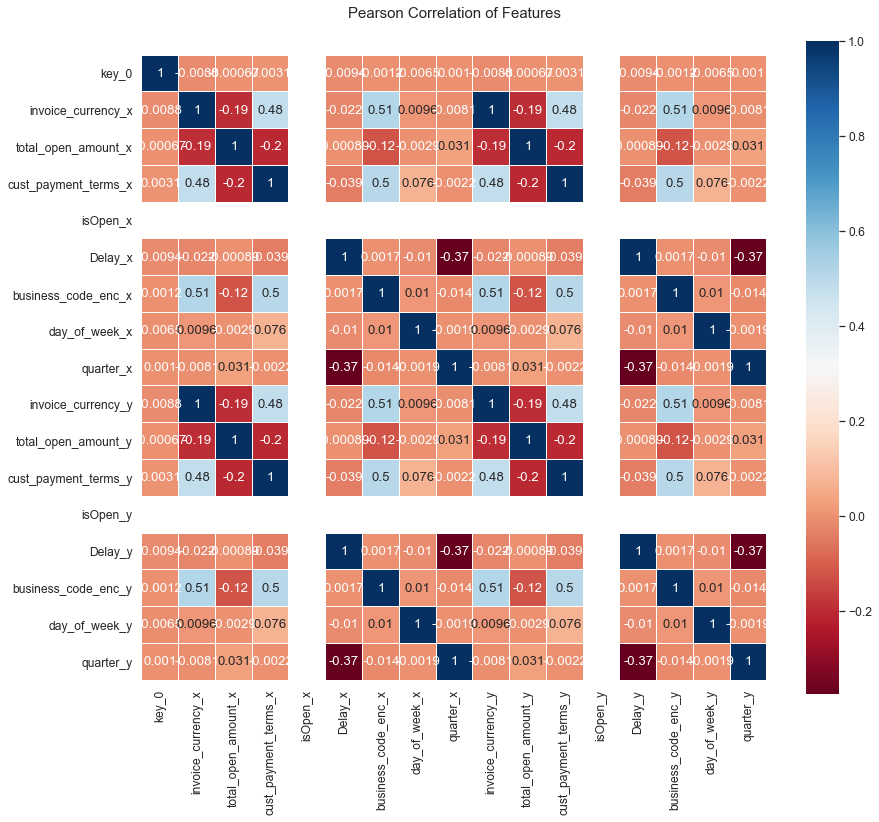

In [53]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(main_train.merge(main_train , on = main_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### As we see that left with clear date,due_in_date which is constant no use during trainging no we also drop them for now

In [54]:
main_train=main_train.drop(['clear_date','due_in_date'],axis=1)
main_test=main_test.drop(['clear_date'],axis=1)
main_test1=main_test.copy()
main_test1.head()

,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,business_code_enc,day_of_week,quarter
1,2020-05-20,1,36603.87,25,1,1,1,2
3,2020-05-08,0,46291.48,3,1,0,6,2
6,2020-04-16,1,37465.05,13,1,1,2,2
9,2020-04-03,1,7832.30,23,1,1,4,1
14,2020-04-15,1,1898.20,25,1,1,1,1


In [55]:
 main_test=main_test.drop(['due_in_date'],axis=1)

In [56]:
# also since all the columns have been converted to int/ float , you can use variance threshold

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(main_train)

VarianceThreshold(threshold=0.8)

In [57]:
sel.variances_

array([7.26781126e-02, 1.61892348e+09, 1.45470915e+02, 0.00000000e+00,
       8.27658020e+03, 3.13119801e-01, 3.31498041e+00, 1.27331056e+00])

### So we Maped our Features using feture engineering and feature selection and now we will going to split our main_train

# Data Splitting

### Converting the main_train into X and y so that we can pass it onto train_test_split function

In [58]:
# X --> contains the dataframe without the target i.e delay
X = main_train.drop('Delay',axis=1)

# y --> contains only the target value 
y = main_train['Delay']

### Splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [60]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [61]:
X_train.shape , X_val.shape , X_test.shape

((27998, 7), (6000, 7), (6000, 7))

In [62]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 29464 to 13582
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   invoice_currency    39998 non-null  int32  
 1   total_open_amount   39998 non-null  float64
 2   cust_payment_terms  39998 non-null  int32  
 3   isOpen              39998 non-null  int64  
 4   Delay               39998 non-null  int64  
 5   business_code_enc   39998 non-null  int32  
 6   day_of_week         39998 non-null  int64  
 7   quarter             39998 non-null  int64  
dtypes: float64(1), int32(3), int64(4)
memory usage: 3.3 MB


#### The datatpe of 'invoice_currency', 'cust_payment_terms','business_code_enc' is in 'int32'. so we will convert it into 'int64' to avoid any datatype error 

In [63]:
import numpy 
main_train['invoice_currency']=main_train['invoice_currency'].astype(numpy.int64)

In [64]:
main_train['cust_payment_terms']=main_train['cust_payment_terms'].astype(numpy.int64)

In [65]:
main_train['business_code_enc']=main_train['business_code_enc'].astype(numpy.int64)

In [66]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 29464 to 13582
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   invoice_currency    39998 non-null  int64  
 1   total_open_amount   39998 non-null  float64
 2   cust_payment_terms  39998 non-null  int64  
 3   isOpen              39998 non-null  int64  
 4   Delay               39998 non-null  int64  
 5   business_code_enc   39998 non-null  int64  
 6   day_of_week         39998 non-null  int64  
 7   quarter             39998 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.8 MB


## Building Our Machine Learning Model

#### As I tryied with different regression models like liner regression,logistic regression but so getting good mse score so  i'm  I will going to use tree based model 'DecisionTreeRegressior' from this i am getting a good MSE score. also keep the max_depth of the tree 5 which would help out from overfitting our model.

In [67]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [68]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [69]:
y_predict2 = regressor.predict(X_val)

### mse and rmse for the our model 

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict2, squared=False)

144.54308786052698

In [71]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_val, y_predict2, squared=True)
rms

20892.70424825602

In [72]:
delay_null_predict = regressor.predict(main_test)
delay_null_predict

array([-3.69404631,  4.74759945, -3.69404631, ..., 19.8491147 ,
       19.8491147 , 28.51456954])

### Stores our predicited delay in our test_data column name as 'predicted_delay' and also change the datatpye in interger  

In [73]:
test_data = pd.DataFrame(delay_null_predict, columns=['predicted_delay'])

In [74]:
test_data=test_data['predicted_delay'].astype(int)

In [75]:
main_test1['predicted_delay']=test_data

In [76]:
main_test1.head()

,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,business_code_enc,day_of_week,quarter,predicted_delay
1,2020-05-20,1,36603.87,25,1,1,1,2,4.0
3,2020-05-08,0,46291.48,3,1,0,6,2,19.0
6,2020-04-16,1,37465.05,13,1,1,2,2,19.0
9,2020-04-03,1,7832.30,23,1,1,4,1,-3.0
14,2020-04-15,1,1898.20,25,1,1,1,1,-3.0


### Using the predicted_delay we will now findout 'predicted_payment_date' by adding delay into 'Due_in_date' 

In [77]:
main_test1['predicted_payment_date'] = main_test1['due_in_date'] + pd.to_timedelta(main_test1['predicted_delay'], unit='d')

In [78]:
main_test1['predicted_payment_date'].head()

1    2020-05-24
3    2020-05-27
6    2020-05-05
9    2020-03-31
14   2020-04-12
Name: predicted_payment_date, dtype: datetime64[ns]

In [79]:
main_test1.head()

,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,business_code_enc,day_of_week,quarter,predicted_delay,predicted_payment_date
1,2020-05-20,1,36603.87,25,1,1,1,2,4.0,2020-05-24
3,2020-05-08,0,46291.48,3,1,0,6,2,19.0,2020-05-27
6,2020-04-16,1,37465.05,13,1,1,2,2,19.0,2020-05-05
9,2020-04-03,1,7832.30,23,1,1,4,1,-3.0,2020-03-31
14,2020-04-15,1,1898.20,25,1,1,1,1,-3.0,2020-04-12


## Creation of Aging_Bucket

In [80]:
import pandas as pd
Bucket= pd.DataFrame(main_test1['predicted_delay'])

bins = [-100,0, 15, 30, 45, 60]
labels = ['0.0','0', '0-15', '16-30', '31-45']
main_test1['Aging_Bucket'] = pd.cut(main_test1.predicted_delay, bins, labels = labels,include_lowest = True)


In [81]:
main_test1['Aging_Bucket'].head()   

1        0
3     0-15
6     0-15
9      0.0
14     0.0
Name: Aging_Bucket, dtype: category
Categories (5, object): ['0.0' < '0' < '0-15' < '16-30' < '31-45']

### So we are done with our model and this the our final output

In [82]:
main_test1.head()

,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,business_code_enc,day_of_week,quarter,predicted_delay,predicted_payment_date,Aging_Bucket
1,2020-05-20,1,36603.87,25,1,1,1,2,4.0,2020-05-24,0
3,2020-05-08,0,46291.48,3,1,0,6,2,19.0,2020-05-27,0-15
6,2020-04-16,1,37465.05,13,1,1,2,2,19.0,2020-05-05,0-15
9,2020-04-03,1,7832.30,23,1,1,4,1,-3.0,2020-03-31,0.0
14,2020-04-15,1,1898.20,25,1,1,1,1,-3.0,2020-04-12,0.0


## Save Our ml-model in a Pickle file

In [83]:
import pickle
with open("mlmodel.pkl","wb") as file:
    pickle.dump(main_test1,file)

In [84]:
data=pd.read_csv("H2HBABBA1190.CSV")
print(data.shape)

(50000, 19)


In [85]:
##we Slice out the records with Clearing date Null into a separate DataFrame for test set nameas main_test
main_train=data[data.clear_date.isnull()==False]
main_test=data[data.clear_date.isnull()==True]

In [86]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200769623,WAL-MAR systems,NaN,2020,1930859997,05/05/2020,20200505,20200505,20200520,USD,RV,1,NaN,36603.87,20200505,NAH4,1.930860e+09,1
3,CA02,140104277,WALLA foundation,NaN,2020,2960630005,19/04/2020,20200420,20200419,20200508,CAD,RV,1,NaN,46291.48,20200428,CA10,2.960630e+09,1
6,U001,200743996,STATER associates,NaN,2020,1930720295,01/04/2020,20200330,20200401,20200416,USD,RV,1,NaN,37465.05,20200401,NAA8,1.930720e+09,1
9,U001,100024776,PEA corp,NaN,2020,1930575519,28/02/2020,20200226,20200228,20200403,USD,RV,1,NaN,7832.30,20200228,NAG2,1.930576e+09,1
14,U001,200769623,WAL-MAR us,NaN,2020,1930724160,31/03/2020,20200331,20200331,20200415,USD,RV,1,NaN,1898.20,20200331,NAH4,1.930724e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49959,U001,200712105,WALG llc,NaN,2020,1930594858,03/03/2020,20200303,20200303,20200318,USD,RV,1,NaN,645.09,20200303,NAA8,1.930595e+09,1
49975,U001,200704858,WAKE trust,NaN,2020,1930857034,05/05/2020,20200504,20200505,20200520,USD,RV,1,NaN,44930.59,20200505,NAA8,1.930857e+09,1
49981,U001,200769623,WAL-MAR in,NaN,2020,1930583601,01/03/2020,20200229,20200301,20200316,USD,RV,1,NaN,1626.33,20200301,NAH4,1.930584e+09,1
49994,U001,200806580,BE trust,NaN,2020,1930675914,25/03/2020,20200320,20200325,20200409,USD,RV,1,NaN,5434.02,20200325,NAA8,1.930676e+09,1


In [87]:

main_test=main_test.drop(['buisness_year','doc_id','document_create_date','document_create_date.1','baseline_create_date'],axis=1)

In [88]:

main_test=main_test.drop(['business_code','clear_date','posting_date','invoice_currency','document type','posting_id','area_business','cust_payment_terms','isOpen'],axis=1)

In [89]:
main_test['predicted_payment_date']=main_test1['predicted_payment_date'] 

In [90]:
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
main_test['due_in_date']=pd.to_datetime(main_test['due_in_date'])

In [91]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 49998
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             10000 non-null  object        
 1   name_customer           10000 non-null  object        
 2   due_in_date             10000 non-null  datetime64[ns]
 3   total_open_amount       10000 non-null  float64       
 4   invoice_id              10000 non-null  float64       
 5   predicted_payment_date  2018 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 546.9+ KB


# FINAL TEST-SET 

In [92]:
main_test.head()

,cust_number,name_customer,due_in_date,total_open_amount,invoice_id,predicted_payment_date
1,200769623,WAL-MAR systems,2020-05-20,36603.87,1.930860e+09,2020-05-24
3,140104277,WALLA foundation,2020-05-08,46291.48,2.960630e+09,2020-05-27
6,200743996,STATER associates,2020-04-16,37465.05,1.930720e+09,2020-05-05
9,100024776,PEA corp,2020-04-03,7832.30,1.930576e+09,2020-03-31
14,200769623,WAL-MAR us,2020-04-15,1898.20,1.930724e+09,2020-04-12


In [93]:
import pandas as pd
df=pd.DataFrame(main_test)
df.to_csv('FinalMLModelTest.csv')

PermissionError: [Errno 13] Permission denied: 'FinalMLModelTest.csv'